<a href="https://colab.research.google.com/github/leaazzar/deep_learning/blob/main/problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Neural_Network.py

import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

class NeuralNetwork:
    def __init__(self, input_size, num_classes):
        self.model = Sequential()

        # Input Layer
        self.model.add(Dense(128, activation='relu', input_shape=(input_size,)))
        self.model.add(Dropout(0.3))

        # Hidden Layer
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dropout(0.3))

        # Output Layer for Multi-class Classification
        self.model.add(Dense(num_classes, activation='softmax'))

        # Compile the Model with sparse_categorical_crossentropy
        self.model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=20, batch_size=64, callbacks=None):
        if X_val is not None and y_val is not None:
            history = self.model.fit(
                X_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(X_val, y_val),
                callbacks=callbacks,
                verbose=1
            )
        else:
            history = self.model.fit(
                X_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                callbacks=callbacks,
                verbose=1
            )
        return history

    def evaluate(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
        return loss, accuracy

    def predict(self, X):
        return self.model.predict(X)

    def summary(self):
        self.model.summary()


# New Section

In [18]:
# dataset.py

import os
import glob
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def BuildData(images_folder='/content/drive/MyDrive/Dog_Breed_Classification/Images', target_size=(64, 64), test_size=0.2):

    # Get all image file paths
    image_paths = glob.glob(os.path.join(images_folder, '*', '*.jpg'))

    if not image_paths:
        raise ValueError(f"No images found in {images_folder}. Please check the directory structure.")

    # Extract breed names from the file paths
    breeds = [os.path.basename(os.path.dirname(p)) for p in image_paths]

    # Create a DataFrame
    df = pd.DataFrame({'image_path': image_paths, 'breed': breeds})

    # Encode the breed labels using LabelEncoder
    label_encoder = LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['breed'])
    label_to_breed = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

    # Split the data into training and testing sets
    train_df, test_df = train_test_split(
        df,
        test_size=test_size,
        stratify=df['label'],
        random_state=42
    )

    def preprocess_image(image_path, target_size=target_size):

        try:
            image = Image.open(image_path).convert('RGB')
            image = image.resize(target_size)
            image = np.array(image)
            image = image / 255.0  # Normalize pixel values
            image = image.flatten()  # Flatten the image
            return image
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            return np.zeros((target_size[0] * target_size[1] * 3,))

    # Prepare training data
    X_train = np.array([preprocess_image(p) for p in train_df['image_path']])
    y_train = np.array(train_df['label'])

    # Prepare testing data
    X_test = np.array([preprocess_image(p) for p in test_df['image_path']])
    y_test = np.array(test_df['label'])

    return X_train, y_train, X_test, y_test, label_to_breed


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,581,638 (6.03 MB)

 Trainable params: 1,581,638 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.1965 - loss: 3.2326 - val_accuracy: 0.2136 - val_loss: 1.8006
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.1851 - loss: 2.2922 - val_accuracy: 0.3136 - val_loss: 1.7367
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.2398 - loss: 1.7426 - val_accuracy: 0.2227 - val_loss: 1.7594
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.2431 - loss: 1.7565 - val_accuracy: 0.2318 - val_loss: 1.7227
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.2147 - loss: 1.7406 - val_accuracy: 0.2318 - val_loss: 1.6875
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.2100 - loss: 1.7060 - val_accuracy: 0.2318 - val_loss: 1.7047
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.2071 - loss: 1.7134 - val_accuracy: 0.2318 - val_loss: 1.7028
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.2186 - loss: 1.7036 - val_accuracy: 0.2318 - v

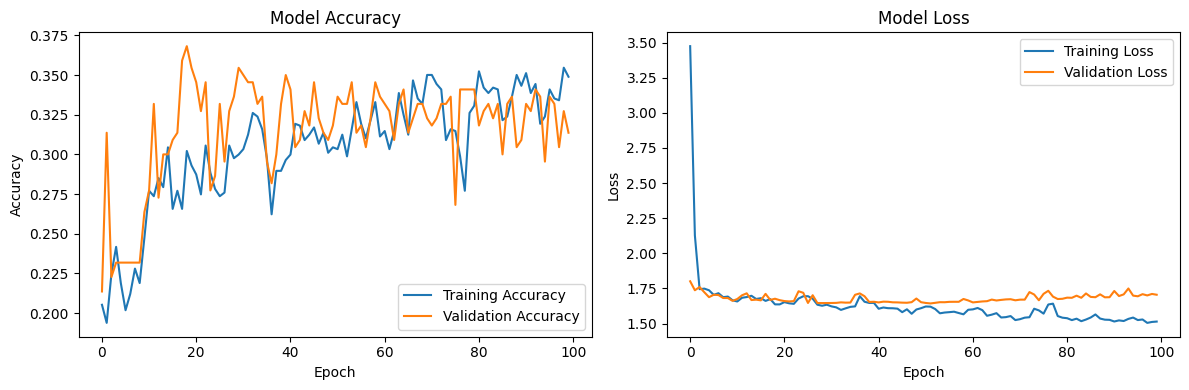

In [21]:
!pip install tensorflow

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('')
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
# Import TensorBoard callback
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback instance
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


X_train, y_train, X_test, y_test, label_to_breed = BuildData()


input_size = X_train.shape[1]
num_classes = len(label_to_breed)
nn = NeuralNetwork(input_size=input_size, num_classes=num_classes)
nn.summary()

history = nn.train(
    X_train,
    y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=100,
    batch_size=128,
    callbacks=[tensorboard_callback]
)


loss, accuracy = nn.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = nn.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # This is correct for y_pred

# Instead of np.argmax, you likely want to directly use y_test
y_true_labels = y_test
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

for i in range(10):
    print(f"Actual: {label_to_breed[y_true_labels[i]]}, Predicted: {label_to_breed[y_pred_labels[i]]}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()